In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.24.3
pandas version: 2.0.3
matplotlib version: 3.7.2


In [2]:
df = pd.read_csv('merged_dataset.csv')
df.shape

(1943, 10)

In [3]:
df.HeartDisease.value_counts() # df.target.unique()

HeartDisease
1    1034
0     909
Name: count, dtype: int64

In [4]:
df.head(3)

df.drop(columns=['ST_Slope'], inplace=True)

In [5]:
disease = len(df[df['HeartDisease'] == 1])
no_disease = len(df[df['HeartDisease']== 0])

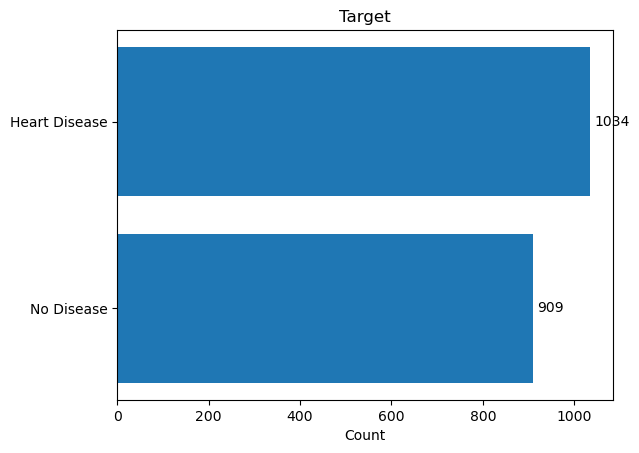

In [6]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

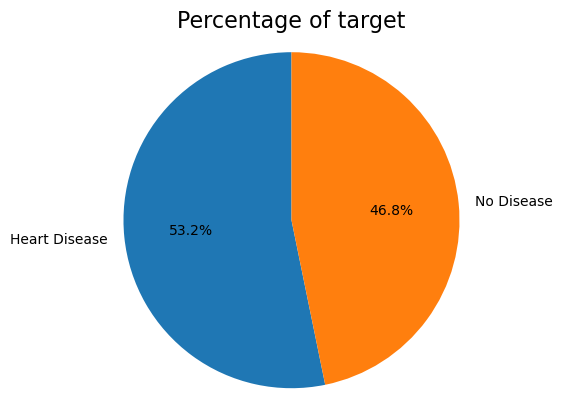

In [7]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [8]:
df.isnull().sum() # missing values

Age               0
Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64

In [9]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [10]:
qualitative

['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']

In [11]:
quantitative

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

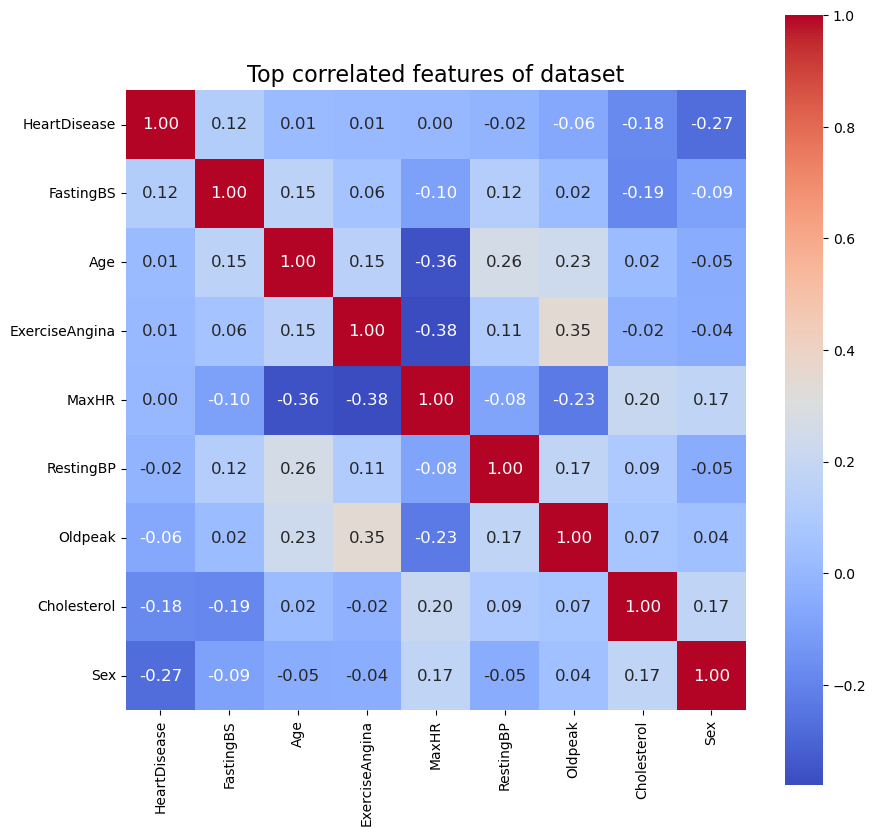

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [12]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'HeartDisease')['HeartDisease'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""


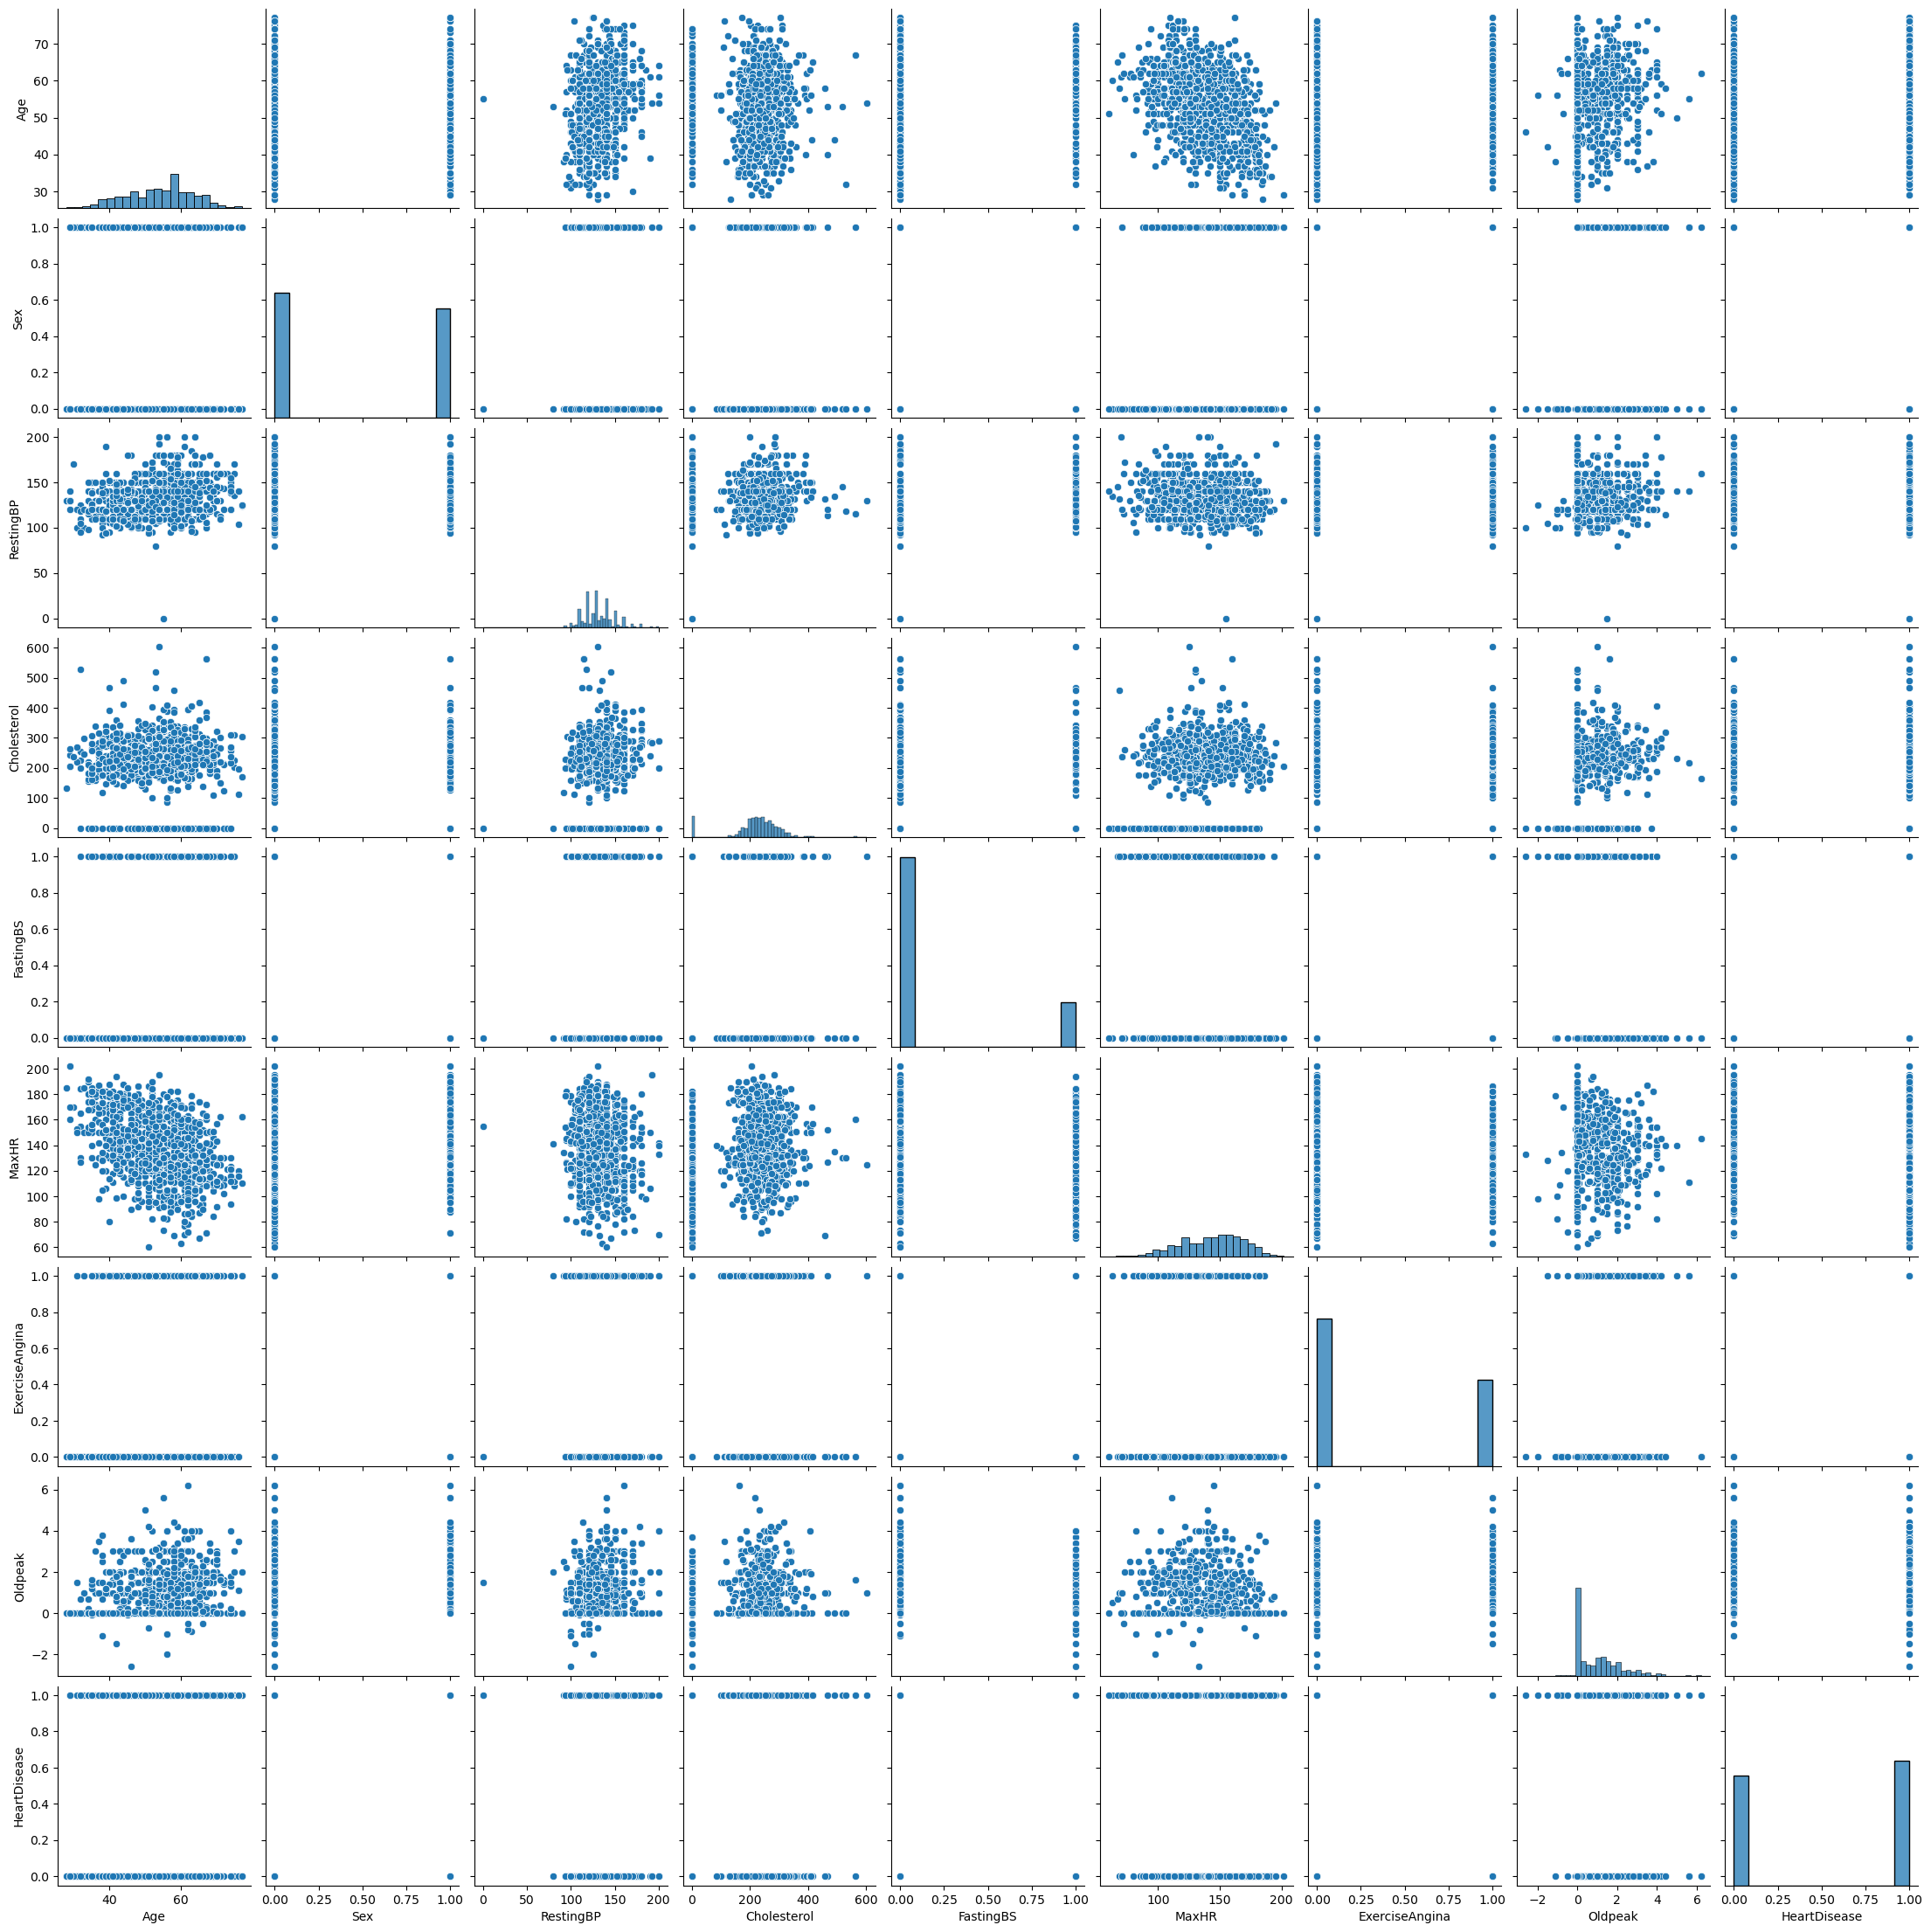

In [13]:
sns.pairplot(df)

In [25]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1943, 8) (1943,)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (1360, 8) (1360,)
shape of X and y respectively (test) : (583, 8) (583,)


In [27]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression

# Define the best parameters
best_params = {'C': 1, 'solver': 'lbfgs', 'max_iter': 1000}

# Create LogisticRegression with best parameters
model = LogisticRegression(**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate and print training score
score_train = model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_test = model.score(X_test, y_test)
print('Testing Score:', score_test)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Logistic Regression
Training Score: 0.6294117647058823
Testing Score: 0.6535162950257289
% of people predicted with heart-disease: 0.5420240137221269
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       267
           1       0.68      0.68      0.68       316

    accuracy                           0.65       583
   macro avg       0.65      0.65      0.65       583
weighted avg       0.65      0.65      0.65       583



In [28]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with the best parameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
decision_tree = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
Y_pred = decision_tree.predict(X_test)

# Calculate and print training score
train_score = decision_tree.score(X_train, y_train)
print('Training Score:', train_score)

# Calculate and print testing score
score_dtc = decision_tree.score(X_test, y_test)
print('Testing Score:', score_dtc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


DecisionTreeClassifier
Training Score: 0.9330882352941177
Testing Score: 0.8027444253859348
% of people predicted with heart-disease: 0.5300171526586621
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       267
           1       0.83      0.81      0.82       316

    accuracy                           0.80       583
   macro avg       0.80      0.80      0.80       583
weighted avg       0.80      0.80      0.80       583



In [29]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with the best parameters
best_params = {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
rf_model = RandomForestClassifier(**best_params)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = rf_model.predict(X_test)

# Calculate and print training score
score_train = rf_model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_rfc = rf_model.score(X_test, y_test)
print('Testing Score:', score_rfc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8524871355060034
% of people predicted with heart-disease: 0.5728987993138936
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       267
           1       0.84      0.89      0.87       316

    accuracy                           0.85       583
   macro avg       0.85      0.85      0.85       583
weighted avg       0.85      0.85      0.85       583



In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best parameters
best_params = {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

# Create KNeighborsClassifier with best parameters
best_knc = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knc.fit(X_train, y_train)

# Make predictions on the testing data
Y_pred = best_knc.predict(X_test)

# Calculate and print training score
score_train = best_knc.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_knc = best_knc.score(X_test, y_test)
print('Testing Score:', score_knc)  # Here, score_knc is calculated

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Training Score: 1.0
Testing Score: 0.7015437392795884
% of people predicted with heart-disease: 0.5523156089193825
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       267
           1       0.72      0.73      0.73       316

    accuracy                           0.70       583
   macro avg       0.70      0.70      0.70       583
weighted avg       0.70      0.70      0.70       583



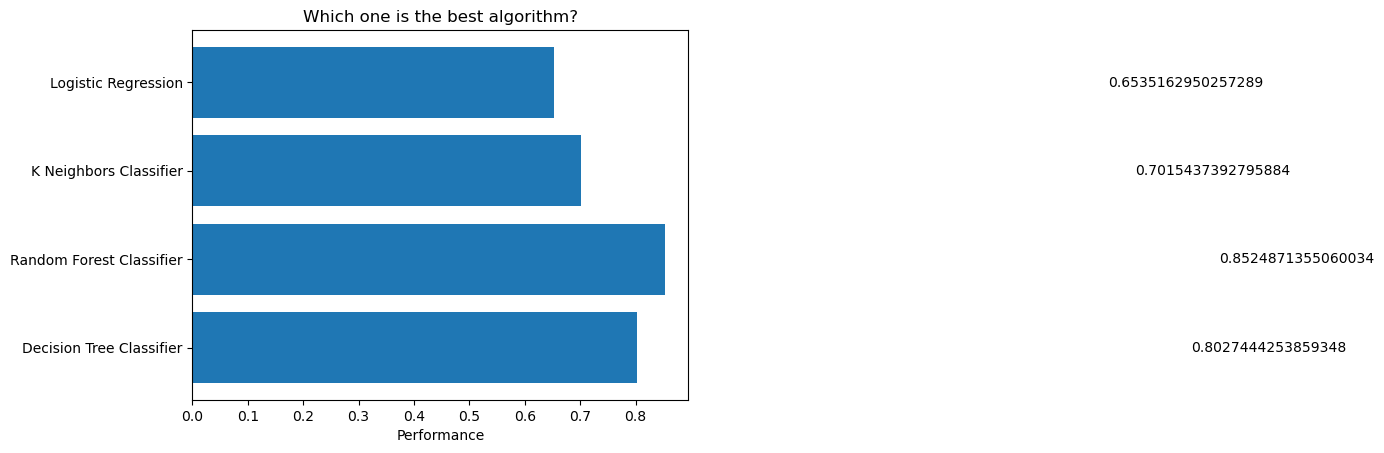

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [32]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print("Decision Tree Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)

Logistic Regression! 0.6535162950257289
Decision Tree Classifier! 0.8027444253859348
Random Forest Classifier! 0.8524871355060034


In [33]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Decision Tree Classifier']=[score_dtc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]

In [34]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,0.852487
Decision Tree Classifier,0.802744
K-Neighbors Classifier,0.701544
Logistic Regression,0.653516
